In [2]:
# SKIP THIS IF YOU WANT TO USE THE NON WEB INTERFACE (can only be done when notebook run locally)
%matplotlib inline

In [5]:
try:
    if __IPYTHON__:
        # this is used for debugging purposes only. allows to reload classes when changed
        get_ipython().magic(u'load_ext autoreload')
        get_ipython().magic(u'autoreload 2')
except NameError:       
    print('Not IPYTHON')    
    pass

import sys
sys.path.append('d://tools/CaImAn/')
import numpy as np
from time import time
from scipy.sparse import coo_matrix
import psutil
import glob
import os
import scipy
from ipyparallel import Client
#import matplotlib as mpl
#mpl.use('TkAgg')

import pylab as pl
#pl.ion()

import caiman as cm
from caiman.components_evaluation import evaluate_components
from caiman.utils.visualization import plot_contours,view_patches_bar,nb_plot_contour,nb_view_patches
from caiman.base.rois import extract_binary_masks_blob
import caiman.source_extraction.cnmf as cnmf
import gc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tifffile not found, using skimage.externals
tifffile package not found, using skimage.external.tifffile


In [6]:
sys.path.append('d://tools/multi-scale/')

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from CNMF import LocalNMF, OldLocalNMF
from functions import init_fig, simpleaxis, showpause
import caiman as cse  # https://github.com/j-friedrich/CaImAn/tree/multi-scale_paper

In [24]:
data2 = np.load('d://tools/multi-scale/data_zebrafish.npy')
data2.shape

(3000L, 96L, 96L)

In [25]:
data2.reshape((-1, 30) + data2.shape[1:]).mean(1).transpose(1, 2, 0).shape

(96L, 96L, 100L)

In [14]:
import skimage.external.tifffile as tifffile

In [26]:
data = tifffile.imread('d://temp/Flow1.tif')
data.shape

(500L, 629L, 1097L)

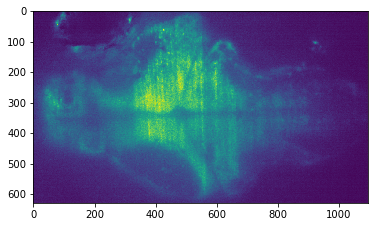

In [16]:
plt.imshow(data[0,:,:])

In [18]:
import caiman

In [19]:
caiman.source_extraction.cnmf.initialization.greedyROI

<function caiman.source_extraction.cnmf.initialization.greedyROI>

In [33]:
sig=(3,3)

In [27]:
centers = caiman.source_extraction.cnmf.initialization.greedyROI(data, nr=2000, gSig=[2, 2])[2].astype(int)

Greedy initialization of spatial and temporal components using spatial Gaussian filtering


In [31]:
runs = 5
iters = 100

In [34]:
MSE_nodec = np.asarray([LocalNMF(data, centers, sig, verbose=True, iters=iters,
                                     iters0=0, mb=0)[0] for _ in range(runs)])

0: MSE = 595.25370
1: MSE = 590.21702
2: MSE = 588.65477
3: MSE = 587.88170
4: MSE = 587.42932
5: MSE = 587.13366
6: MSE = 586.91787
7: MSE = 586.75507
8: MSE = 586.62277
9: MSE = 586.51392
10: MSE = 586.42740
11: MSE = 586.35560
12: MSE = 586.29709
13: MSE = 586.24979
14: MSE = 586.21094
15: MSE = 586.17789
16: MSE = 586.14840
17: MSE = 586.12257
18: MSE = 586.09992
19: MSE = 586.07921
20: MSE = 586.05941
21: MSE = 586.04212
22: MSE = 586.02560
23: MSE = 586.01054
24: MSE = 585.99639
25: MSE = 585.98309
26: MSE = 585.96989
27: MSE = 585.95811
28: MSE = 585.94676
29: MSE = 585.93627
30: MSE = 585.92644
31: MSE = 585.91613
32: MSE = 585.90664
33: MSE = 585.89809
34: MSE = 585.89001
35: MSE = 585.88213
36: MSE = 585.87501
37: MSE = 585.86845
38: MSE = 585.86190
39: MSE = 585.85568
40: MSE = 585.84984
41: MSE = 585.84367
42: MSE = 585.83806
43: MSE = 585.83303
44: MSE = 585.82818
45: MSE = 585.82381
46: MSE = 585.81940
47: MSE = 585.81474
48: MSE = 585.81090
49: MSE = 585.80681
50: MSE = 

KeyboardInterrupt: 

In [ ]:
mbls = [2, 5, 10, 20, 30, 40]
try:
    MSE_decT = np.load('results/MSE_decT.npy')
except:
    MSE_decT = np.asarray(
        [[LocalNMF(data, centers, sig, verbose=True, iters=iters,
                   iters0=30, mb=i, ds=[1, 1])[0]
          for i in mbls] for _ in range(runs)])

In [ ]:
try:
    MSE_decTS = np.load('results/MSE_decT+S.npy')
except:
    MSE_decTS = np.asarray(
        [[LocalNMF(data, centers, sig, verbose=True, iters=iters,
                   iters0=30, mb=30, ds=[i, i])[0]
          for i in [2, 3, 4, 6, 8]] for _ in range(runs)])

In [ ]:
try:
    MSE_sub = np.load('results/MSE_sub.npy')
except:
    MSE_sub = np.asarray(
        [LocalNMF(data, centers, sig, verbose=True, iters=iters, mb=1, method='subsample')[0]
         for _ in range(runs)])